In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Loading the data
data = pd.read_csv('21.csv')

data.head()

,x,y
0,-0.332003,3.623539
1,-0.470748,-14.366733
2,0.361913,53.803069
3,1.291804,125.086206
4,0.412083,38.743890


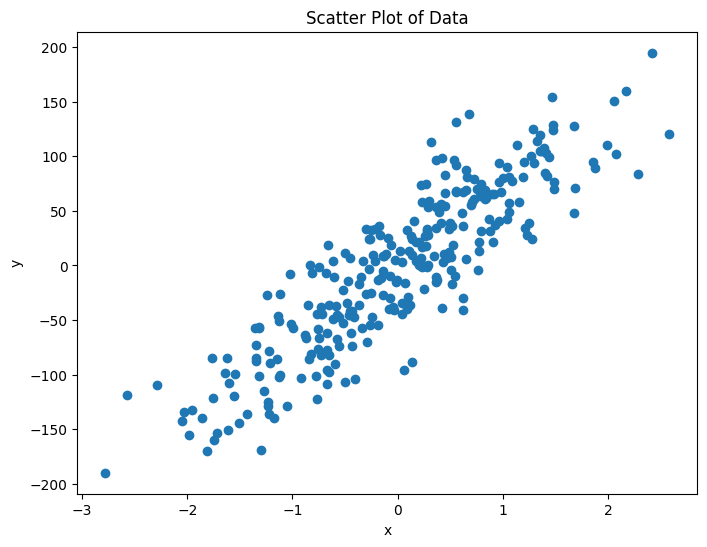

In [2]:
# Plotting the data
plt.figure(figsize=(8, 6))
plt.scatter(data['x'], data['y'])
plt.title('Scatter Plot of Data')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Точечная диаграмма переменных "x" и "y" показывает квадратичную или параболическую зависимость между двумя переменными. Это говорит о том, что модель полиномиальной регрессии может хорошо подходить для этих данных. 

Уравнение полиномиальной (квадратичной) зависимости второй степени имеет вид:

y = ax^2 + bx + c

Где "y" - зависимая переменная (которую мы стремимся предсказать), "x" - независимая переменная, а "a", "b", "c" - параметры модели, которые нам нужно оценить. На следующих этапах потребуется для обучающих и тестовых наборов данных оценить эту модель и ее параметры, используя обычный метод наименьших квадратов. Мы также изучим производительность модели, используя такие показатели, как MSE, MAPE и R-squared. Наконец, мы спрогнозируем значение "y", учитывая конкретное значение "x".

In [3]:
# Splitting data into training and testing sets
X = data['x'].values.reshape(-1,1)
y = data['y'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Transforming x values for polynomial regression
X_train_poly = np.column_stack((X_train**2, X_train))
X_test_poly = np.column_stack((X_test**2, X_test))

# Creating and training the model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Model parameters
params = np.append(model.intercept_, model.coef_)
params

array([-1.30392312, -2.57882322, 68.34002466])

Параметрами нашей модели полиномиальной регрессии являются:

Intercept (c) = -1.304
Coefficient of x² (a) = -2.579
Coefficient of x (b) = 68.340

Итак, наше квадратное уравнение становится:

y = -2.579x2 + 68.340x - 1.304

Теперь давайте оценим производительность модели, используя среднеквадратичную ошибку (MSE), среднюю абсолютную процентную ошибку (MAPE) и показатели R-квадрата. Кроме того, мы определим функцию градиентного спуска для оптимизации параметров модели.

In [4]:
# Making predictions on the test data
y_pred = model.predict(X_test_poly)
y_pred

array([[  93.94901955],
       [-119.27678877],
       [  81.12719961],
       [-171.12136413],
       [  17.90364157],
       [   9.28426879],
       [ -55.96590235],
       [ -61.49647453],
       [  17.66573901],
       [ -44.00728764],
       [  67.91454428],
       [-130.10247161],
       [   7.04429947],
       [  16.38460852],
       [  63.23752215],
       [ -43.22527669],
       [ 124.31074074],
       [  51.45963773],
       [  13.61719557],
       [  40.29939225],
       [  93.8358149 ],
       [  33.58664429],
       [  12.1677119 ],
       [  89.84601911],
       [-126.2721094 ],
       [  10.85158994],
       [  62.29061394],
       [ -96.01042046],
       [ -55.15440836],
       [ -91.95991758],
       [  25.03263708],
       [ -98.44415896],
       [ -95.67169213],
       [ -58.46355341],
       [  27.10051535],
       [   5.03784883],
       [ -54.56225281],
       [  23.49776787],
       [  87.06529268],
       [ -63.74998342],
       [  17.68297851],
       [ -18.926

In [5]:
# computing MSE
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE): ", mse)

# computing MAPE
def mape(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mape(y_test, y_pred)
print("Mean Absolute Percentage Error (MA): ", mape)

Mean Squared Error (MSE):  1029.4981131896084
Mean Absolute Percentage Error (MA):  291.53811981514923


In [7]:
x_sample = np.array([[0.5, .5**2]])
y_sample_pred = model.predict(x_sample)
y_sample_pred

array([[14.49167144]])

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=0b5c42e9-03cc-405b-afdc-d268c9da1518' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>